c:\Users\hizkia\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hizkia\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


              precision    recall  f1-score   support

  bukan buah       1.00      1.00      1.00       220
        duku       1.00      1.00      1.00       112
     langsat       1.00      1.00      1.00       233

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565



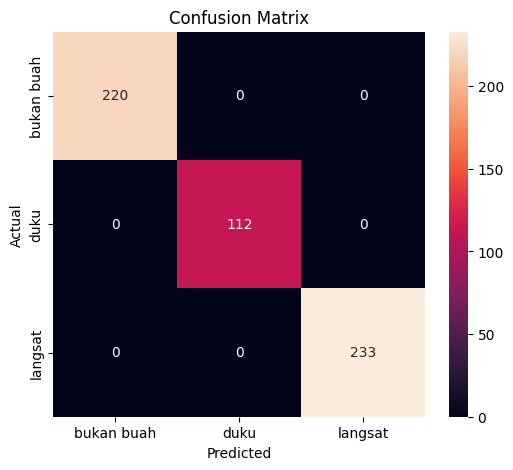

In [1]:
import torch
from torchvision import models, datasets, transforms
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

# Load kelas
with open("classes.json") as f:
    classes = json.load(f)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset test
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
test_dataset = datasets.ImageFolder("datasets", transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load model
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, len(classes))
model.load_state_dict(torch.load("fruit_model.pth"))
model = model.to(device)
model.eval()

# Evaluasi
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
print(classification_report(all_labels, all_preds, target_names=classes))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
